In [24]:
import sys
import numpy as np 
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [3]:
# URL of the CSV file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv'
# Download the CSV file
response = requests.get(url)
csv_content = response.content

# Save the downloaded CSV content to a local file
with open('downloaded_data.csv', 'wb') as file:
    file.write(csv_content)

# Load the CSV content into a DataFrame
df = pd.read_csv('downloaded_data.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [8]:
df.describe

<bound method NDFrame.describe of      tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0      11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1      33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2      23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3      38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4       7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
..      ...   ...      ...     ...  ...     ...    ...       ...       ...   
195    55.0  44.0     24.0    83.0  1.0    23.0    0.0       1.0       0.0   
196    34.0  23.0      3.0    24.0  1.0     7.0    0.0       1.0       0.0   
197     6.0  32.0     10.0    47.0  1.0    10.0    0.0       1.0       0.0   
198    24.0  30.0      0.0    25.0  4.0     5.0    0.0       1.0       1.0   
199    61.0  50.0     16.0   190.0  2.0    22.0    1.0       1.0       1.0   

     longmon  ...  pager  int

I will turn my data to array to be more compitable with skilearning libraries

In [13]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [12]:
y = np.asarray(df[['churn']])
y[0:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

Normalize the data

In [15]:
#normalize the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

split the dataset 

In [16]:
#split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

i will use logistic regression

In [18]:
#train the logistic regrission model
log_reg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


now we predict

In [20]:
yhat = log_reg.predict(X_test)
yhat

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0.])

i want to know the propability

In [21]:
yhat_prob = log_reg.predict_proba(X_test)
yhat_prob

array([[0.4907192 , 0.5092808 ],
       [0.41170298, 0.58829702],
       [0.55623113, 0.44376887],
       [0.55246118, 0.44753882],
       [0.55914856, 0.44085144],
       [0.43157731, 0.56842269],
       [0.74552898, 0.25447102],
       [0.50736007, 0.49263993],
       [0.4639548 , 0.5360452 ],
       [0.6907988 , 0.3092012 ],
       [0.68528182, 0.31471818],
       [0.64369439, 0.35630561],
       [0.55804874, 0.44195126],
       [0.69095711, 0.30904289],
       [0.45444361, 0.54555639],
       [0.60433297, 0.39566703],
       [0.52764933, 0.47235067],
       [0.46811946, 0.53188054],
       [0.52853793, 0.47146207],
       [0.51982877, 0.48017123],
       [0.69079389, 0.30920611],
       [0.48434643, 0.51565357],
       [0.40720361, 0.59279639],
       [0.46012775, 0.53987225],
       [0.5775216 , 0.4224784 ],
       [0.69886707, 0.30113293],
       [0.48247747, 0.51752253],
       [0.66003578, 0.33996422],
       [0.72279247, 0.27720753],
       [0.61237333, 0.38762667],
       [0.

model evaluation using jaccard

In [22]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7878787878787878

confusion matrix

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 7  2]
 [ 5 26]]


Confusion matrix, without normalization
[[ 7  2]
 [ 5 26]]


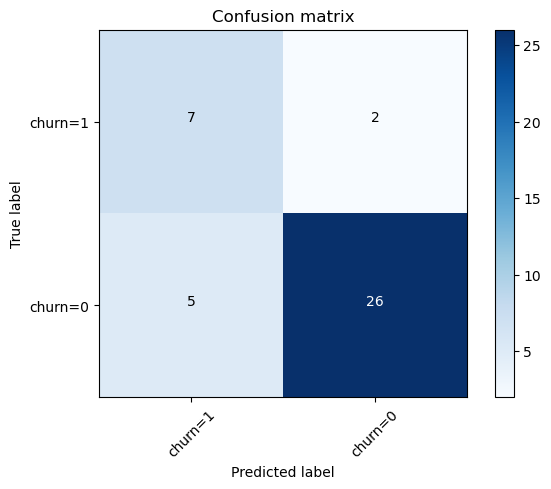

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [27]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88        31
         1.0       0.58      0.78      0.67         9

    accuracy                           0.82        40
   macro avg       0.76      0.81      0.77        40
weighted avg       0.85      0.82      0.83        40



evaluate using logloss

In [28]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5629381654151254